In [2]:
import pandas as pd 
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

In [3]:
folder_path = '/home/ruijingyang/cytotox/eda_phase/data/sample1'
images_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')]


In [34]:
images = [Image.open(image_path) for image_path in images_paths]


In [35]:
images[0].size

(1080, 1080)

In [36]:
array_r = np.array(images[0])
array_g = np.array(images[1])
array_b = np.array(images[2])

In [37]:
merged_array = np.dstack((array_r, array_g, array_b)).astype(np.uint8) #], axis=-1).astype(np.uint8)

In [38]:
merged_array.shape

(1080, 1080, 3)

In [39]:
merged_image = Image.fromarray(merged_array)
merged_image.save('merged_image.tif')

In [2]:
plate_map = '/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_plate_map.csv'
plate_pd = pd.read_csv(plate_map)
plate_pd.describe()

,PlateMap,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,50,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,35,35,51,51
unique,18,18,19,19,19,19,19,19,19,19,...,19,19,19,19,5,5,2,2,10,10
top,A,1,ORM-0364078,ORM-0364074,ORM-0364074,ORM-0049279,ORM-0049279,ORM-0120988,ORM-0120988,ORM-0140940,...,ORM-0178130,ORM-0178130,ORM-0226420,ORM-0226420,10,10,DMSO,DMSO,POS1,POS1
freq,3,19,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,32,32,6,6


In [3]:
results = '/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_results.csv'
try:
    res_pd = pd.read_csv(results, encoding='latin1')
except UnicodeDecodeError as e:
    print("Error reading the file with 'latin1' encoding:", e)

In [4]:
res_pd.describe()

,Object Id,Highest Tested Concentration uM,Lowest Precipitated Concentration uM,Cell count IC50 uM,Cell count LEC uM,Nucleus Intensity EC50 uM,Nucleus Intensity LEC uM,Nucleus Area IC50 uM,Nucleus Area LEC uM,Plasma membrane permeability EC50 uM,PMP LEC uM,Lysosomal activity EC50 uM,Lysosomal activity LEC uM,MitoArea EC50 uM,MitoArea LEC uM,MMP EC50 uM,MMP LEC uM,Interpretation
count,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
unique,10,3,2,8,6,8,8,8,7,8,7,6,9,8,7,6,6,4
top,ORM-0364078,200,-,>200,>200,>200,>200,>200,20.06,>200,>200,>200,>200,>200,>200,>200,>200,"cytotoxic, mitotoxic"
freq,1,8,9,3,3,3,2,3,3,3,3,5,2,3,3,5,3,5


In [ ]:
def convert_concentration(value):
    try:
        return float(value)
    except ValueError:
        # convert ">200" to 200，represents >200uM
        if '>' in value:
            return float(value.replace('>', '').strip())
        return None

res_pd['IC50 uM Numeric'] = res_pd['Cell count IC50 uM'].apply(convert_concentration)
res_pd['LEC uM Numeric'] = res_pd['Cell count LEC uM'].apply(convert_concentration)

In [5]:
# imgIndex = '/home/ruijingyang/cytotox/data/ImageIndex.ColumbusIDX.csv'
# try:
#     imgIndex_pd = pd.read_csv(imgIndex, encoding='Windows-1252')
# except UnicodeDecodeError as e:
#     print("Error reading the file with 'latin1' encoding:", e)

### Check the image data

In [6]:
image_path = '/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_TIFFS'

### Channel 1

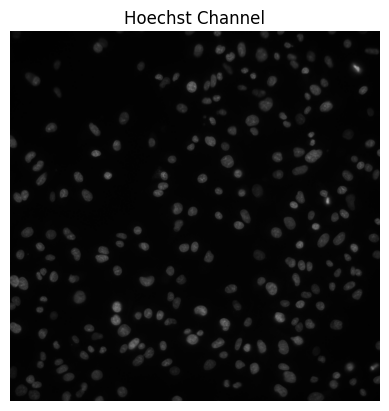

In [7]:
image_nuclei = cv2.imread('/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_TIFFS/001001-1-001001001.tif')
B, G, R = cv2.split(image_nuclei)
Hoechst_channel = B
plt.imshow(cv2.cvtColor(Hoechst_channel, cv2.COLOR_BGR2RGB))
plt.title('Hoechst Channel')
plt.axis('off')
plt.show()

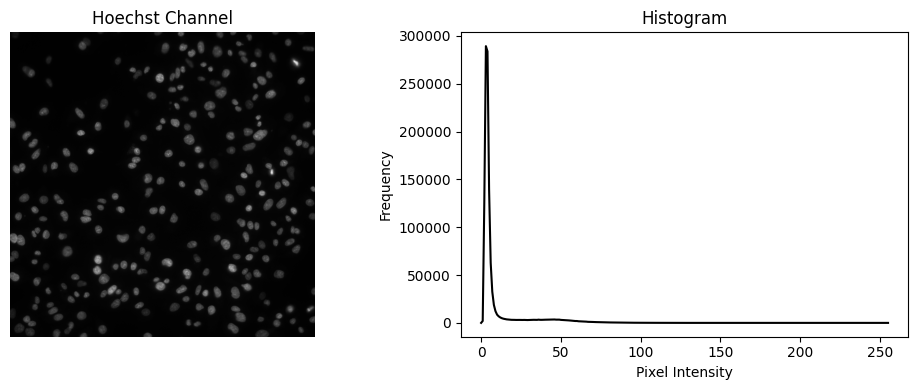

In [8]:
hist = cv2.calcHist([Hoechst_channel], [0], None, [256], [0,256])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(Hoechst_channel, cmap='gray')
plt.title('Hoechst Channel')
plt.axis('off')

plt.subplot(122)
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

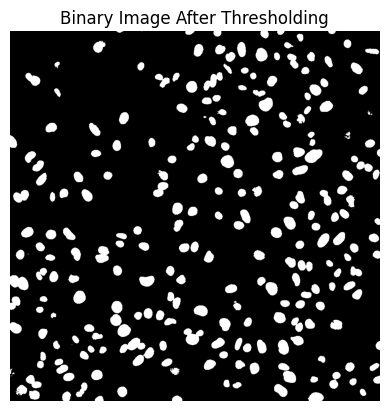

In [9]:
thresh, Hoechst_thresh = cv2.threshold(Hoechst_channel, 20, 255, cv2.THRESH_BINARY)
plt.imshow(Hoechst_thresh, cmap='gray') 
plt.title('Binary Image After Thresholding')
plt.axis('off')
plt.show()

### channel 2

In [10]:
image2 = cv2.imread('/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_TIFFS/001001-1-001001002.tif')
B, G, R = cv2.split(image2)
channel2 = G
# plt.imshow(cv2.cvtColor(channel2, cv2.COLOR_BGR2RGB))
# plt.title('Channel2')
# plt.axis('off')
# plt.show()

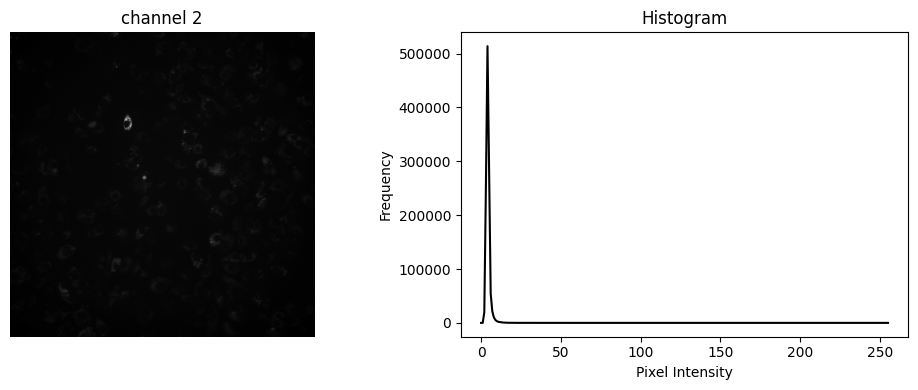

In [11]:
hist = cv2.calcHist([channel2], [0], None, [256], [0,256])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(channel2, cmap='gray')
plt.title('channel 2')
plt.axis('off')

plt.subplot(122)
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

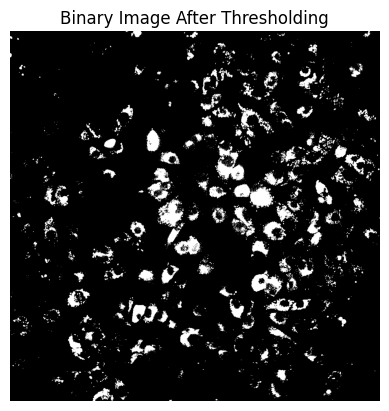

In [12]:
thresh, channel2_thresh = cv2.threshold(channel2, 5, 255, cv2.THRESH_BINARY)
plt.imshow(channel2_thresh, cmap='gray') 
plt.title('Binary Image After Thresholding')
plt.axis('off')
plt.show()

### Channel 3

In [13]:
image3 = cv2.imread('/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_TIFFS/001001-1-001001003.tif')
B, G, R = cv2.split(image3)
channel3 = R

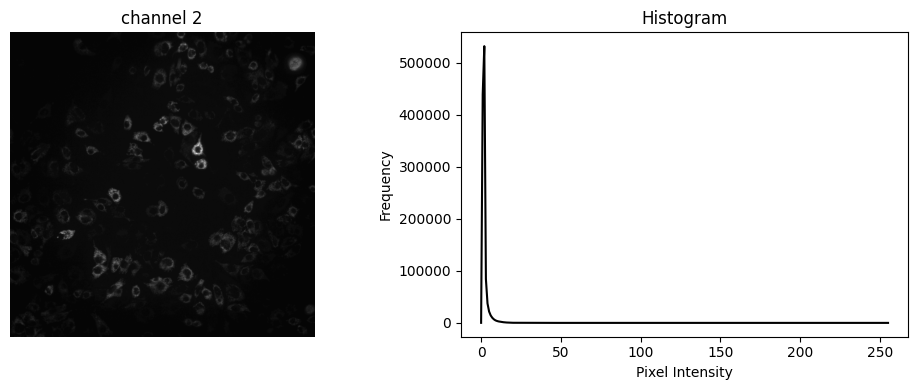

In [14]:
hist = cv2.calcHist([channel3], [0], None, [256], [0,256])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(channel3, cmap='gray')
plt.title('channel 2')
plt.axis('off')

plt.subplot(122)
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

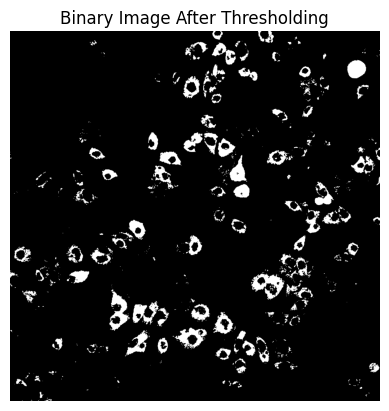

In [15]:
thresh, channel3_thresh = cv2.threshold(channel3, 4, 255, cv2.THRESH_BINARY)
plt.imshow(channel3_thresh, cmap='gray') 
plt.title('Binary Image After Thresholding')
plt.axis('off')
plt.show()

### channel 4

In [16]:
image4 = cv2.imread('/home/ruijingyang/cytotox/data/Cytotox_HCA_065_20230907_B0_TIFFS/001001-1-001001004.tif')
B, G, R = cv2.split(image4)
image_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
# channel3 = R

In [17]:
ch4thresh_value, _ = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ch4adp_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                       cv2.THRESH_BINARY, 11, 2)

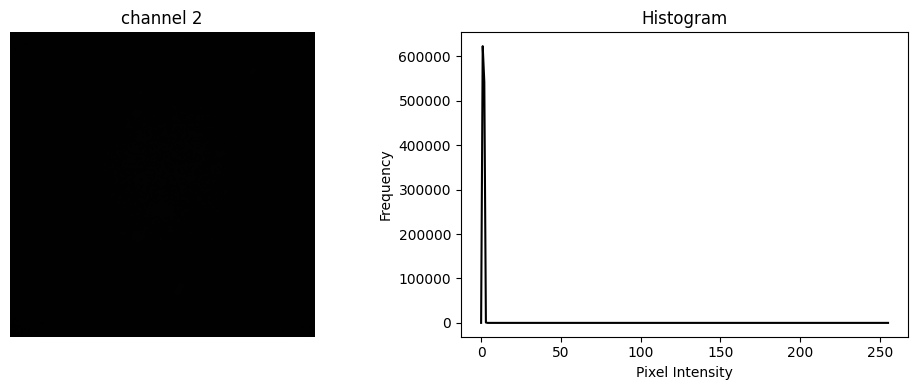

In [18]:
hist = cv2.calcHist([image4], [0], None, [256], [0,256])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image4, cmap='gray')
plt.title('channel 2')
plt.axis('off')

plt.subplot(122)
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [19]:
# if len(image_gray.shape) != 2 or image_gray.dtype != np.uint8:
#     image_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
#     # image_gray = cv2.convertScaleAbs(image_gray) 

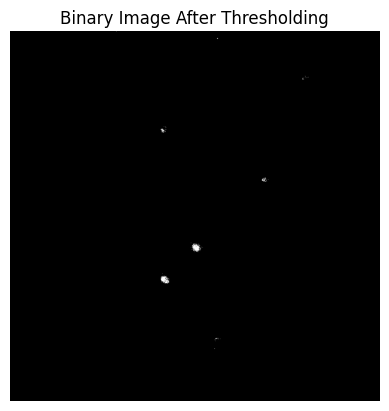

In [20]:
thresh, channel4_thresh = cv2.threshold(image_gray, 2, 255, cv2.THRESH_BINARY)
plt.imshow(channel4_thresh, cmap='gray') 
plt.title('Binary Image After Thresholding')
plt.axis('off')
plt.show()

In [21]:
thresh

2.0

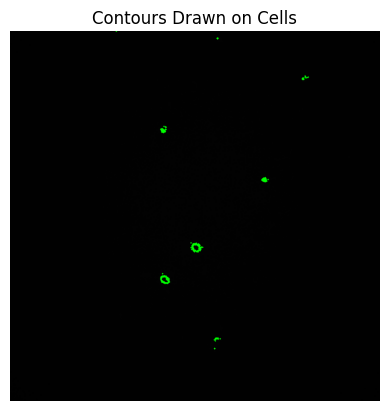

In [22]:
contours, hierarchy = cv2.findContours(channel4_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image4, contours, -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
plt.title('Contours Drawn on Cells')
plt.axis('off')
plt.show()

### Channel 5